In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

### importing dataset

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:

#data['age_bin'] = data['age_bin'].astype(int)


In [4]:
#data['age_bin']

In [5]:
data.shape

(5110, 12)

 # preprocessing

In [6]:
# def to_bucket(arr):
#     bucket = np.empty(arr.shape[0])
#     for index,x in enumerate(arr):
#         if (x <= 20):
#             bucket[index] = 0
#         elif (x > 20) & (x <= 35):
#             bucket[index] = 1
#         elif (x > 35) & (x <= 50):
#             bucket[index] = 2
#         elif (x > 50) & (x <= 70):
#             bucket[index] = 3
#         else:
#             bucket[index] = 4
#     return bucket
# data['age']=to_bucket(data['age'])
# data.head()

In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

droping id as all values are unique

In [9]:

data.drop(['id'], axis = 1,inplace=True)

In [10]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
data.drop(data[data['gender']=='Other'].index,inplace=True)


In [12]:
data.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [14]:
# data.dropna(axis=0,inplace=True)
data['bmi'].fillna((data['bmi'].mean()), inplace=True)

In [15]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [16]:
data.shape
#data.head(30)

(5109, 11)

In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [18]:
data=data.reset_index(drop=True)

In [19]:
data[data['stroke']==0]


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.00000,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.20000,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.60000,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.90000,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.10000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


## splitting of dataset

In [20]:
  from sklearn.model_selection import train_test_split
  train, test = train_test_split(data,test_size=0.22, random_state=55)
    

In [21]:
test.shape

(1124, 11)

In [22]:
test['stroke'].unique()

array([0, 1], dtype=int64)

In [23]:
test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3012,Female,49.0,1,0,Yes,Govt_job,Urban,56.37,39.4,smokes,0
1903,Male,44.0,0,0,Yes,Private,Urban,142.31,29.1,smokes,0
2045,Male,2.0,0,0,No,children,Rural,86.57,18.0,Unknown,0
3764,Female,25.0,0,0,No,Private,Rural,76.72,21.5,Unknown,0
3206,Female,62.0,0,0,Yes,Private,Urban,92.99,29.3,formerly smoked,0


In [24]:


train=train.reset_index(drop=True)
test=test.reset_index(drop=True)


In [25]:
train['stroke'].value_counts()

0    3790
1     195
Name: stroke, dtype: int64

In [26]:
# !pip install imblearn
test['stroke'].value_counts()


0    1070
1      54
Name: stroke, dtype: int64

In [27]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,79.0,0,0,Yes,Private,Urban,198.79,24.9,never smoked,0
1,Female,38.0,0,0,Yes,Private,Urban,69.34,43.7,never smoked,0
2,Male,57.0,0,0,Yes,Private,Rural,76.28,31.4,formerly smoked,0
3,Female,82.0,0,0,Yes,Self-employed,Urban,84.78,33.6,formerly smoked,0
4,Female,74.0,0,0,Yes,Self-employed,Urban,74.96,26.6,never smoked,1


In [28]:
test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,49.0,1,0,Yes,Govt_job,Urban,56.37,39.40000,smokes,0
1,Male,44.0,0,0,Yes,Private,Urban,142.31,29.10000,smokes,0
2,Male,2.0,0,0,No,children,Rural,86.57,18.00000,Unknown,0
3,Female,25.0,0,0,No,Private,Rural,76.72,21.50000,Unknown,0
4,Female,62.0,0,0,Yes,Private,Urban,92.99,29.30000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
1119,Female,66.0,0,0,No,Private,Urban,93.73,23.90000,smokes,0
1120,Male,78.0,1,0,Yes,Self-employed,Urban,90.19,28.89456,Unknown,0
1121,Female,28.0,0,0,Yes,Private,Rural,106.68,29.30000,never smoked,0
1122,Female,47.0,0,0,Yes,Govt_job,Urban,122.32,23.90000,Unknown,0


# EDA

gender

In [29]:
train['gender'].unique()

array(['Male', 'Female'], dtype=object)

<AxesSubplot:xlabel='gender', ylabel='count'>

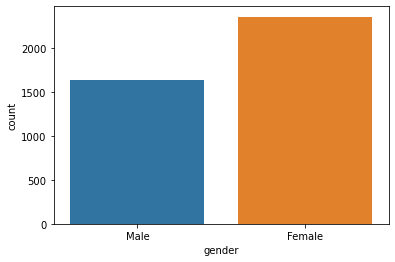

In [30]:
sns.countplot(x ='gender', data = train)

In [31]:
train.groupby('gender')['stroke'].value_counts()

gender  stroke
Female  0         2242
        1          110
Male    0         1548
        1           85
Name: stroke, dtype: int64

In [32]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
train['gender']= label_encoder.fit_transform(train['gender'])


In [33]:
test['gender']= label_encoder.transform(test['gender'])

In [34]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,79.0,0,0,Yes,Private,Urban,198.79,24.9,never smoked,0
1,0,38.0,0,0,Yes,Private,Urban,69.34,43.7,never smoked,0
2,1,57.0,0,0,Yes,Private,Rural,76.28,31.4,formerly smoked,0
3,0,82.0,0,0,Yes,Self-employed,Urban,84.78,33.6,formerly smoked,0
4,0,74.0,0,0,Yes,Self-employed,Urban,74.96,26.6,never smoked,1


In [35]:
test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.0,1,0,Yes,Govt_job,Urban,56.37,39.40000,smokes,0
1,1,44.0,0,0,Yes,Private,Urban,142.31,29.10000,smokes,0
2,1,2.0,0,0,No,children,Rural,86.57,18.00000,Unknown,0
3,0,25.0,0,0,No,Private,Rural,76.72,21.50000,Unknown,0
4,0,62.0,0,0,Yes,Private,Urban,92.99,29.30000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
1119,0,66.0,0,0,No,Private,Urban,93.73,23.90000,smokes,0
1120,1,78.0,1,0,Yes,Self-employed,Urban,90.19,28.89456,Unknown,0
1121,0,28.0,0,0,Yes,Private,Rural,106.68,29.30000,never smoked,0
1122,0,47.0,0,0,Yes,Govt_job,Urban,122.32,23.90000,Unknown,0


### age

In [36]:
#sns.distplot(train['age'])

In [37]:
#.distplot(np.sqrt(train['age']))

In [38]:
#sns.distplot(np.log(train['age']))

In [39]:
#age_bucket={tuple(range(1,20)):1,tuple(range(20,35)):2,tuple(range(35,50)):3,tuple(range(50,105)):4}

In [40]:
train.groupby('age')['stroke'].value_counts()

age    stroke
0.08   0          2
0.16   0          2
0.24   0          5
0.32   0          3
0.40   0          2
                 ..
80.00  1         11
81.00  0         36
       1         11
82.00  0         39
       1          8
Name: stroke, Length: 145, dtype: int64

In [41]:
data.head(10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.80000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.89456,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.20000,Unknown,1


hypertension

In [42]:
train['hypertension'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='hypertension', ylabel='count'>

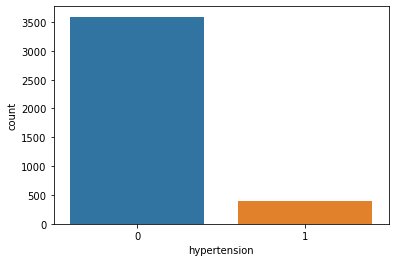

In [43]:
sns.countplot(x ='hypertension', data = train)

In [44]:
train.groupby('hypertension')['stroke'].value_counts()

hypertension  stroke
0             0         3448
              1          144
1             0          342
              1           51
Name: stroke, dtype: int64

heart disease

In [45]:
train.groupby('heart_disease')['stroke'].value_counts()

heart_disease  stroke
0              0         3611
               1          158
1              0          179
               1           37
Name: stroke, dtype: int64

ever_married

In [46]:
train.groupby('ever_married')['stroke'].value_counts()

ever_married  stroke
No            0         1326
              1           26
Yes           0         2464
              1          169
Name: stroke, dtype: int64

In [47]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
train['ever_married']= label_encoder.fit_transform(train['ever_married'])


In [48]:
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,79.0,0,0,1,Private,Urban,198.79,24.9,never smoked,0
1,0,38.0,0,0,1,Private,Urban,69.34,43.7,never smoked,0
2,1,57.0,0,0,1,Private,Rural,76.28,31.4,formerly smoked,0
3,0,82.0,0,0,1,Self-employed,Urban,84.78,33.6,formerly smoked,0
4,0,74.0,0,0,1,Self-employed,Urban,74.96,26.6,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3980,1,55.0,0,0,1,Private,Rural,118.69,26.4,Unknown,0
3981,0,55.0,0,0,1,Private,Rural,112.47,32.8,smokes,0
3982,0,7.0,0,0,0,children,Rural,63.98,23.0,Unknown,0
3983,1,82.0,0,0,1,Private,Urban,217.57,33.5,formerly smoked,0


In [49]:
test['ever_married']= label_encoder.transform(test['ever_married'])

In [50]:
test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.0,1,0,1,Govt_job,Urban,56.37,39.40000,smokes,0
1,1,44.0,0,0,1,Private,Urban,142.31,29.10000,smokes,0
2,1,2.0,0,0,0,children,Rural,86.57,18.00000,Unknown,0
3,0,25.0,0,0,0,Private,Rural,76.72,21.50000,Unknown,0
4,0,62.0,0,0,1,Private,Urban,92.99,29.30000,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
1119,0,66.0,0,0,0,Private,Urban,93.73,23.90000,smokes,0
1120,1,78.0,1,0,1,Self-employed,Urban,90.19,28.89456,Unknown,0
1121,0,28.0,0,0,1,Private,Rural,106.68,29.30000,never smoked,0
1122,0,47.0,0,0,1,Govt_job,Urban,122.32,23.90000,Unknown,0


work_type

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

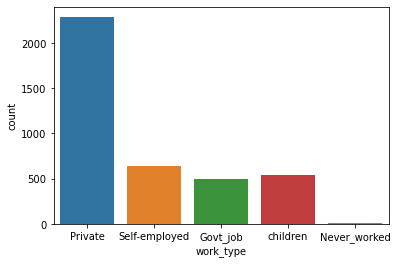

In [51]:
sns.countplot(train['work_type'])

In [52]:
train.groupby('work_type')['stroke'].value_counts()

work_type      stroke
Govt_job       0          474
               1           28
Never_worked   0           16
Private        0         2170
               1          117
Self-employed  0          592
               1           48
children       0          538
               1            2
Name: stroke, dtype: int64

In [53]:
dict1={'Govt_job':1,'Never_worked':0,'Private':2,'Self-employed':3,'children':0}

In [54]:
train['work_type']=train['work_type'].map(dict1)

In [55]:
test['work_type']=test['work_type'].map(dict1)

residence_type

In [56]:
train['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [57]:
 
label_encoder3 = preprocessing.LabelEncoder()
train['Residence_type']= label_encoder3.fit_transform(train['Residence_type'])

In [58]:
train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,79.0,0,0,1,2,1,198.79,24.9,never smoked,0
1,0,38.0,0,0,1,2,1,69.34,43.7,never smoked,0
2,1,57.0,0,0,1,2,0,76.28,31.4,formerly smoked,0
3,0,82.0,0,0,1,3,1,84.78,33.6,formerly smoked,0
4,0,74.0,0,0,1,3,1,74.96,26.6,never smoked,1


In [59]:
test['Residence_type']= label_encoder3.transform(test['Residence_type'])

avg_glucose_level

In [60]:
train.groupby('stroke')['avg_glucose_level'].mean()

stroke
0    104.495259
1    133.394205
Name: avg_glucose_level, dtype: float64

bmi

In [61]:
train.groupby('stroke')['bmi'].mean()

stroke
0    28.953078
1    30.269849
Name: bmi, dtype: float64

smoking_status

In [62]:
train['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [63]:
train.groupby('smoking_status')['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1172
                 1           39
formerly smoked  0          640
                 1           55
never smoked     0         1409
                 1           71
smokes           0          569
                 1           30
Name: stroke, dtype: int64

In [64]:
#unkn=0.016,form=0.066,smokes=0.045,nvr=0.044(probabilities)
d={'Unknown':1,'formerly smoked':2,'never smoked':0,'smokes':3}

In [65]:
train['smoking_status']=train['smoking_status'].map(d)

In [66]:
test['smoking_status']=test['smoking_status'].map(d)

In [67]:
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,79.0,0,0,1,2,1,198.79,24.9,0,0
1,0,38.0,0,0,1,2,1,69.34,43.7,0,0
2,1,57.0,0,0,1,2,0,76.28,31.4,2,0
3,0,82.0,0,0,1,3,1,84.78,33.6,2,0
4,0,74.0,0,0,1,3,1,74.96,26.6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3980,1,55.0,0,0,1,2,0,118.69,26.4,1,0
3981,0,55.0,0,0,1,2,0,112.47,32.8,3,0
3982,0,7.0,0,0,0,0,0,63.98,23.0,1,0
3983,1,82.0,0,0,1,2,1,217.57,33.5,2,0


In [68]:
test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.0,1,0,1,1,1,56.37,39.40000,3,0
1,1,44.0,0,0,1,2,1,142.31,29.10000,3,0
2,1,2.0,0,0,0,0,0,86.57,18.00000,1,0
3,0,25.0,0,0,0,2,0,76.72,21.50000,1,0
4,0,62.0,0,0,1,2,1,92.99,29.30000,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1119,0,66.0,0,0,0,2,1,93.73,23.90000,3,0
1120,1,78.0,1,0,1,3,1,90.19,28.89456,1,0
1121,0,28.0,0,0,1,2,0,106.68,29.30000,0,0
1122,0,47.0,0,0,1,1,1,122.32,23.90000,1,0


In [69]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# min_max_scaler = MinMaxScaler()
# scaler = StandardScaler()
# # Scale Age, GlucoseLevel, Bmi
# train[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(train[['age', 'avg_glucose_level', 'bmi']])
# test[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(test[['age', 'avg_glucose_level', 'bmi']])

# features and model

In [70]:
X=train.iloc[:,:-1]

In [71]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,79.0,0,0,1,2,1,198.79,24.9,0
1,0,38.0,0,0,1,2,1,69.34,43.7,0
2,1,57.0,0,0,1,2,0,76.28,31.4,2
3,0,82.0,0,0,1,3,1,84.78,33.6,2
4,0,74.0,0,0,1,3,1,74.96,26.6,0
...,...,...,...,...,...,...,...,...,...,...
3980,1,55.0,0,0,1,2,0,118.69,26.4,1
3981,0,55.0,0,0,1,2,0,112.47,32.8,3
3982,0,7.0,0,0,0,0,0,63.98,23.0,1
3983,1,82.0,0,0,1,2,1,217.57,33.5,2


In [72]:
y=train['stroke']
y

0       0
1       0
2       0
3       0
4       1
       ..
3980    0
3981    0
3982    0
3983    0
3984    0
Name: stroke, Length: 3985, dtype: int64

In [168]:
from sklearn.feature_selection import SelectKBest,f_classif
fs=SelectKBest(score_func=f_classif)
fit=fs.fit(X,y)


In [172]:
features_score=pd.DataFrame(fit.scores_)
features_pvalues=pd.DataFrame(fit.pvalues_)
features=pd.DataFrame(X.columns)
feature_score=pd.concat([features,features_score,features_pvalues],axis=1)
feature_score.columns=['input',"F","p"]
feature_score.nlargest(6,columns='F')

,input,F,p
1,age,262.821745,2.737209e-57
7,avg_glucose_level,77.973155,1.537075e-18
3,heart_disease,74.817244,7.373568e-18
2,hypertension,62.143926,4.089386e-15
4,ever_married,39.152543,4.333605e-10
5,work_type,28.022149,1.264014e-07


In [174]:
x_train=train[['age','avg_glucose_level','heart_disease','hypertension','ever_married']]

In [175]:
X_test=test[['age','avg_glucose_level','heart_disease','hypertension','ever_married']]

In [176]:
X_test.head()

,age,avg_glucose_level,heart_disease,hypertension,ever_married
0,49.0,56.37,0,1,1
1,44.0,142.31,0,0,1
2,2.0,86.57,0,0,0
3,25.0,76.72,0,0,0
4,62.0,92.99,0,0,1


In [177]:
y_test=test['stroke']
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1119    0
1120    0
1121    0
1122    0
1123    0
Name: stroke, Length: 1124, dtype: int64

### making imbalanced data balanced by using SMOTE

In [193]:

import imblearn 
from imblearn.over_sampling import SMOTE
sm=SMOTE()
Xtrain_sm,Ytrain_sm=sm.fit_resample(X,y)

In [194]:
Ytrain_sm.value_counts()

1    3790
0    3790
Name: stroke, dtype: int64

In [202]:
Xtrain_sm=Xtrain_sm[['age','avg_glucose_level','heart_disease','hypertension','ever_married']]
Xtrain_sm

,age,avg_glucose_level,heart_disease,hypertension,ever_married
0,79.000000,198.790000,0,0,1
1,38.000000,69.340000,0,0,1
2,57.000000,76.280000,0,0,1
3,82.000000,84.780000,0,0,1
4,74.000000,74.960000,0,0,1
...,...,...,...,...,...
7575,78.000000,218.475743,0,0,1
7576,58.835762,72.567864,0,0,1
7577,78.827706,72.737926,0,0,1
7578,73.234311,260.688478,0,0,1


## logistic regression

In [203]:
 from sklearn.linear_model import LogisticRegression


In [204]:
clf = LogisticRegression()
clf.fit(x_train,y)
y_pred=clf.predict(X_test)

In [205]:
y_pred=pd.DataFrame(y_pred)
y_pred.value_counts()

0    1123
1       1
dtype: int64

In [206]:
y_test.value_counts()

0    1070
1      54
Name: stroke, dtype: int64

## logistic regression smoted

In [207]:
clf_sm = LogisticRegression()
clf_sm.fit(Xtrain_sm,Ytrain_sm)
y_pred_sm=clf_sm.predict(X_test)

In [208]:
y_pred_sm=pd.DataFrame(y_pred_sm)
y_pred_sm.value_counts()

0    851
1    273
dtype: int64

In [209]:
from sklearn import metrics

In [210]:
# print(metrics.plot_confusion_matrix(clf_sm,y_test,y_pred_sm))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_sm)

array([[831, 239],
       [ 20,  34]], dtype=int64)

## knn

In [212]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y)
y_pred1=neigh.predict(X_test)


In [213]:
from sklearn.metrics import accuracy_score 

In [214]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1069,    1],
       [  54,    0]], dtype=int64)

## knn smoted

In [215]:

neigh_sm = KNeighborsClassifier(n_neighbors=6)
neigh_sm.fit(Xtrain_sm, Ytrain_sm)
y_pred_sm=neigh_sm.predict(X_test)


In [216]:
print("acc:",accuracy_score(y_test,y_pred_sm)*100) 

acc: 80.33807829181495


In [217]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_sm)

array([[874, 196],
       [ 25,  29]], dtype=int64)

## rf

In [218]:
# Testing with Random Forest Algorithm after smote
from sklearn.ensemble import RandomForestClassifier
RF2 = RandomForestClassifier()
RF2.fit(Xtrain_sm, Ytrain_sm)
y_pred_sm_rf=RF2.predict(X_test)

In [219]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_sm_rf)

array([[966, 104],
       [ 42,  12]], dtype=int64)

In [220]:
print("acc:",accuracy_score(y_test,y_pred_sm_rf)*100) 

acc: 87.01067615658363


In [221]:
print(metrics.classification_report(y_test,y_pred_sm_rf))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1070
           1       0.10      0.22      0.14        54

    accuracy                           0.87      1124
   macro avg       0.53      0.56      0.54      1124
weighted avg       0.92      0.87      0.89      1124



# svc

In [222]:
from sklearn.svm import SVC
SVC2 = SVC()
SVC2.fit(Xtrain_sm, Ytrain_sm)
y_pred_sm_svc=SVC2.predict(X_test)

In [223]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_sm_svc)

array([[768, 302],
       [ 12,  42]], dtype=int64)

In [224]:
# from sklearn import metrics
#print(metrics.plot_confusion_matrix(SVC2, Xtrain_sm,Ytrain_sm))
print(metrics.classification_report(y_test,y_pred_sm_svc))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1070
           1       0.12      0.78      0.21        54

    accuracy                           0.72      1124
   macro avg       0.55      0.75      0.52      1124
weighted avg       0.94      0.72      0.80      1124



In [225]:
print("acc:",accuracy_score(y_test,y_pred_sm_svc)*100) 

acc: 72.06405693950177


## dt

In [226]:
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier()
DT2.fit(Xtrain_sm, Ytrain_sm)

dt_pred_resampled = DT2.predict(X_test)

In [227]:

confusion_matrix(y_test, dt_pred_resampled )

array([[964, 106],
       [ 39,  15]], dtype=int64)

In [228]:
print(metrics.classification_report(y_test,dt_pred_resampled))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1070
           1       0.12      0.28      0.17        54

    accuracy                           0.87      1124
   macro avg       0.54      0.59      0.55      1124
weighted avg       0.92      0.87      0.89      1124



In [229]:
### TRIED CROSS VALIDATION 

## cross validation

In [230]:
train_crs=pd.DataFrame(Xtrain_sm)

In [231]:
train_crs['stroke']=pd.DataFrame(Ytrain_sm)

In [232]:
train_crs

,age,avg_glucose_level,heart_disease,hypertension,ever_married,stroke
0,79.000000,198.790000,0,0,1,0
1,38.000000,69.340000,0,0,1,0
2,57.000000,76.280000,0,0,1,0
3,82.000000,84.780000,0,0,1,0
4,74.000000,74.960000,0,0,1,1
...,...,...,...,...,...,...
7575,78.000000,218.475743,0,0,1,1
7576,58.835762,72.567864,0,0,1,1
7577,78.827706,72.737926,0,0,1,1
7578,73.234311,260.688478,0,0,1,1


In [255]:
test['stroke']

0       0
1       0
2       0
3       0
4       0
       ..
1119    0
1120    0
1121    0
1122    0
1123    0
Name: stroke, Length: 1124, dtype: int64

In [256]:
test=test[['age','avg_glucose_level','heart_disease','hypertension','ever_married','stroke']]

In [257]:
result=[train_crs,test]
crs=pd.concat(result)
crs.shape

(8704, 6)

In [258]:
crs

,age,avg_glucose_level,heart_disease,hypertension,ever_married,stroke
0,79.0,198.79,0,0,1,0
1,38.0,69.34,0,0,1,0
2,57.0,76.28,0,0,1,0
3,82.0,84.78,0,0,1,0
4,74.0,74.96,0,0,1,1
...,...,...,...,...,...,...
1119,66.0,93.73,0,0,0,0
1120,78.0,90.19,0,1,1,0
1121,28.0,106.68,0,0,1,0
1122,47.0,122.32,0,0,1,0


In [261]:
crs_x=crs.iloc[:,:-1]
crs_x

,age,avg_glucose_level,heart_disease,hypertension,ever_married
0,79.0,198.79,0,0,1
1,38.0,69.34,0,0,1
2,57.0,76.28,0,0,1
3,82.0,84.78,0,0,1
4,74.0,74.96,0,0,1
...,...,...,...,...,...
1119,66.0,93.73,0,0,0
1120,78.0,90.19,0,1,1
1121,28.0,106.68,0,0,1
1122,47.0,122.32,0,0,1


## svc

In [262]:
from sklearn.model_selection import cross_val_score
scor=cross_val_score(SVC2,crs_x,crs['stroke'],cv=10)

In [263]:
scor

array([0.74856487, 0.76578645, 0.75660161, 0.76463835, 0.7862069 ,
       0.74942529, 0.77701149, 0.78965517, 0.76551724, 0.78735632])

In [264]:
scor_recall=cross_val_score(SVC2,crs_x,crs['stroke'],cv=10,scoring='recall')

In [265]:
#recall scores
scor_recall

array([0.74805195, 0.76363636, 0.74805195, 0.76883117, 0.77604167,
       0.7734375 , 0.75260417, 0.80989583, 0.79427083, 0.78385417])

## dt

In [266]:
scor_recall=cross_val_score(DT2,crs_x,crs['stroke'],cv=10,scoring='recall')

In [267]:
scor_recall

array([0.72207792, 0.9012987 , 0.91948052, 0.91168831, 0.875     ,
       0.9140625 , 0.93489583, 0.90625   , 0.90104167, 0.80729167])

In [268]:
scor_preci=cross_val_score(DT2,crs_x,crs['stroke'],cv=10,scoring='precision')

In [269]:
scor_preci.mean()

0.8778279725735526

In [270]:
scor_preci2=cross_val_score(DT2,crs_x,crs['stroke'],cv=10,scoring='accuracy')

In [271]:
scor_preci2


array([0.82319173, 0.8978186 , 0.89552239, 0.90815155, 0.88390805,
       0.91034483, 0.94137931, 0.90689655, 0.90229885, 0.85402299])

In [272]:
scor_preci2.mean()


0.8923534845665572